# Градиентный спуск

Градиентный спуск - это метод решения задачи оптимизация, позволяющий найти минимальное значение функции при определённых условиях.

Формально говоря к этим условиям относятся: выпуклость функции, дифференцируемость функции, выполнение для первой производной функции условия Липшица (оно выполняется, если вторая производная функции ограничена)*.

При этом на практике использования "правильного" с точки зрения математики градиентного спуска при решении практических задач затруднительно в силу того, что скорость достижения минимума имеет неменьше значение, чем сам факт возможности его достичь, не говоря о том, что практически все функции, возникающие при решении задач машинного обучения невыпуклые.

*по сути это означает равномерность и непрерывность функции

Как правило, в задачах машинного обучения функционал $a(w)$ представим в виде суммы $l$ функций:

$
    a(w)
    =
    \frac{1}{l}
    \sum_{i = 0}^{l}
        a_i(w).
$

То есть, результат работы модели это сумма произведения некоторых параметров на рассчитанные веса.

Проблема метода градиентного спуска состоит в том,
что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$
    \nabla_w a(w)
    =
    \frac{1}{l}
    \sum_{i = 0}^{l}
        \nabla_w a_i(w).
$

Естественно такое вычисление может быть крайне трудоёмко. В связи с этим придумывают различные отпимизации.

## Стохастический градиентный спуск

В этом методе в качестве оценки градиента используется оценка градиента только по одному из параметров. То есть происходит такая замена:

$
    \nabla_w a(w)
    \approx
    \nabla_w a_{i_k}(w),
$

$
    w^{(k)} = w^{(k - 1)} - \eta_k \nabla a_{i_k}(w^{(k - 1)}).
$

где $i_k$ - случайно выбранный номер слагаемого из функционала. Английский вариант названия - stochastic gradient descent, SGD.

Естественно, такой подход ведёт к потере точности нахождения оптимума и не гарантирует сходимость. При этом очевиден и самый простой способ повысить точность: посчитать градиент не на одном параметре, а на нескольких.

$
    \nabla_w a(w)
    \approx
    \frac{1}{n}
    \sum_{j = 1}^{n}
    \nabla_w a_{i_{kj}}(w).
$

Такая модификация SGD называется mini-batch gradient descent,
который часто используется для обучения дифференцируемых моделей

Отдельно нужно отметить, что в случае использования SGD необходимо кропотливо подбирать скорость обучения. Ведь оптимальное направление движения для каждого отдельного параметра может (в том числе значительно) отличаться от направления движения к экстремуму для всех параметров в совокупности.

Если не менять скорость обучения, то может оказаться так, что добраться до минимума вообще не получится. При этом и логика изменения скорость понятна - её необходимо уменьшать со временем.

## Средний стохастический градиентный спуск

Следующим шагом в развитии метода градиентного спуска становится вполне логичная технология, которая с одной стороны позволяет хранить весь градиент, а с другой стороны рассчитывает его только по одному или нескольким признакам на каждой итерации.

Инциализуем начальное значение весов случайным образом*, получив некоторые $w^0$, и инициализируются вспомогательные переменные $g_i^0$,
соответствующие градиентам слагаемых функционала:

$
    g_i^{(0)}
    =
    \nabla a_i(w^{(0)}),
    \qquad
    i = 1, \dots, l.
$


На $k$-й итерации выбирается переменная $i_k$, для которой происходит пересчёт градиента:

$
    g_i^{(k)}
    =
    \begin{cases}
        \nabla a_i(w^{(k - 1)}),
        \quad
        &\text{если}\ i = i_k;\\
        g_i^{(k - 1)}
        \quad
        &\text{иначе}.
    \end{cases}
$

Итоговая оценка градиента при этом вычисляется, как средняя оценка всех текущих значений грдиента.

$
    \nabla_w a(w)
    \approx
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        g_i^{(k)}.
$

Таким образом градиентный шаг выглядит следующим образом:

$
    w^{(k)}
    =
    w^{(k - 1)}
    -
    \eta_k
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
    g_i^{(k)}.
$

Ниже можно посмотреть на [Разницу](https://www.analyticsvidhya.com/blog/2022/07/gradient-descent-and-its-types/) в работе различных градиентных спусков.

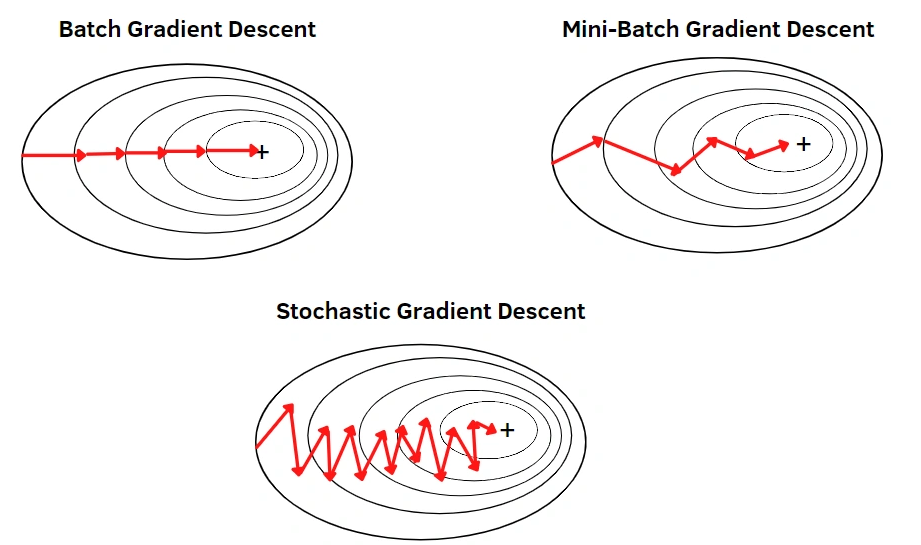

И ещё один [пример](https://www.samvitjain.com/blog/gradient-descent/).

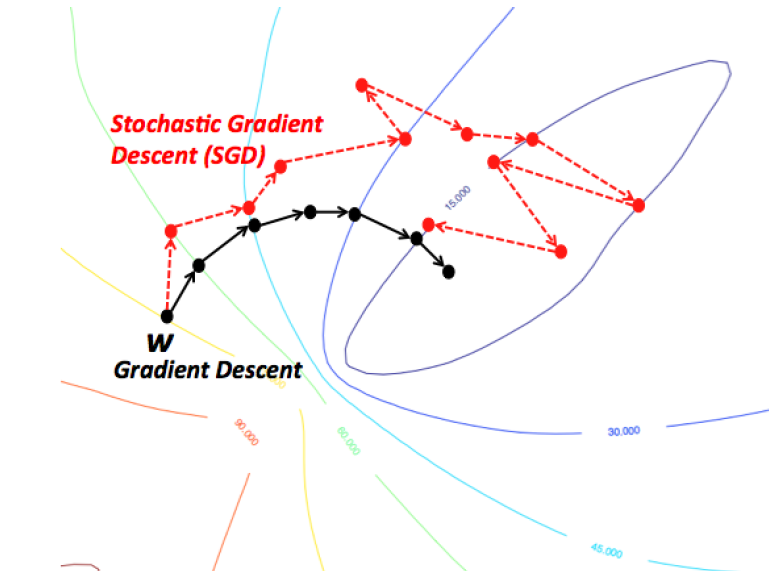

## Momentum

При использовании расчёта полного градиента, а уж тем более при использовании метода стохатического градиентного спуска возможна ситуация, в которой градиент будет постоянно менять своё направления, фактически демонстрируя осцеляцию вокруг точки минимума. Чтобы избежать этого можно не просто рассчитывать текущее значение градиента, но усреднять значение градиента с предыудщих шагов.

$
\begin{align*}
    &h_k = \alpha h_{k - 1} + \beta \eta_k \nabla_w Q(w^{(k-1)}).
\end{align*}
$

Где $\alpha$ и $\beta$ - константы в диапазоне от 0 до 1, определяющие то, с какой скоростью будет происходить усреднение градиента.

Веса модели будут в таком случае меняться в соответствии со следующим правилом:

$
    w^{(k)} = w^{(k-1)} - h_k.
$

Ниже можно наглядно посмотреть на [разницу](https://www.scaler.com/topics/momentum-based-gradient-descent/) в движении с учётом "инерции" и без её учёта.

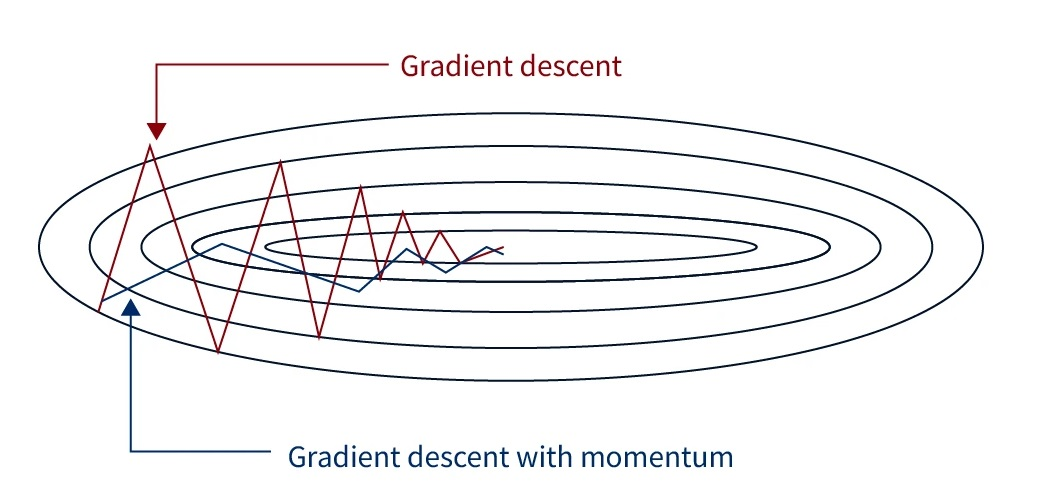

## RMSProp

Ключевая проблема в методе градиентного спуска - выбор длины шага или "скорости обучения". RMSProp - метод, позволяющий управлять длинной шагой в зависимости от самого градиента. То есть, чем он больше, тем и шаг больше. Однако, скорость не меняется мгновенно. Таким образом метод позволяет постепенно корректировать скорость движения без резких рывков.

$
\begin{align*}
    &G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w a(w^{(k-1)}))_j^2.;\\
    &w_j^{(k)} = w_j^{(k-1)} - \frac{\eta_t}{\sqrt{G_{kj} + Θ}} (\nabla_w a(w^{(k-1)}))_j.
\end{align*}
$


##Adam

Метод является комбинаций RMSProp и momentum.